## Surprise Housing  - Housing Price Prediction Assignment

### By Anirudhya Bhattacharya



### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

 

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

The solution is divided into the following sections:

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### Business Goal 


We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

   ### 1. Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import datetime
# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


%matplotlib inline

#### Reading the dataset

In [4]:
surp = pd.read_csv("train.csv")
surp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(surp.shape)

(1460, 81)


## 2. Data cleaning and Data Preparation

#### 'Id' is just an identifier with no predictive power. So let's drop the column.

In [6]:
surp.drop('Id', axis = 1, inplace = True)
print(surp.shape)

(1460, 80)


#### Checking missing percentage

In [7]:
percent_missing = (surp.isnull().sum() / surp.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
RoofMatl         0.000000
dtype: float64

#### Missing Value Treatment:
Instead of dropping the all the null values which will result in a data loss, we will impute the null values for those which have less than 80% missing value according to the domain understanding and the data dictionary provided with the data.

* NA in PoolQC, Alley, Fence and MiscFeature column has more than 80% missing value. So we will drop it.
* NA in Alley column means No Alley, so we will replace NA by it.
* NA in Fence column means No Fence, so we will replace NA by it.
* NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
* NA in LotFrontage column means No LotFrontage, so we will replace NA by 0.
* NA in GarageType, GarageCond, GarageFinish and GarageQual means No Garage, so we will replace NA by it.
* NA in GarageYrBlt means No Garage. So we will impute with future year so that when we will convert to number of years it gives us -1 which will mean no garage.
* NA in BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond and BsmtQual means No Basement, so we will replace NA by it.

In [8]:
surp.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
surp['FireplaceQu'].fillna('No_Fireplace', inplace=True) 
surp['LotFrontage'].fillna(0, inplace=True) 
surp['GarageType'].fillna('No_Garage', inplace=True)
surp['GarageCond'].fillna('No_Garage', inplace=True)
surp['GarageFinish'].fillna('No_Garage', inplace=True)
surp['GarageQual'].fillna('No_Garage', inplace=True)
surp['GarageYrBlt'].fillna(datetime.datetime.now().year+1, inplace=True)
#surp['GarageYrBlt'].fillna(2022, inplace=True)
surp['BsmtExposure'] = surp['BsmtExposure'].replace(np.nan, 'No_Basement')
surp['BsmtFinType2'] = surp['BsmtFinType2'].replace(np.nan, 'No_Basement')
surp['BsmtFinType1'] = surp['BsmtFinType1'].replace(np.nan, 'No_Basement')
surp['BsmtCond'] = surp['BsmtCond'].replace(np.nan, 'No_Basement')
surp['BsmtQual'] = surp['BsmtQual'].replace(np.nan, 'No_Basement')

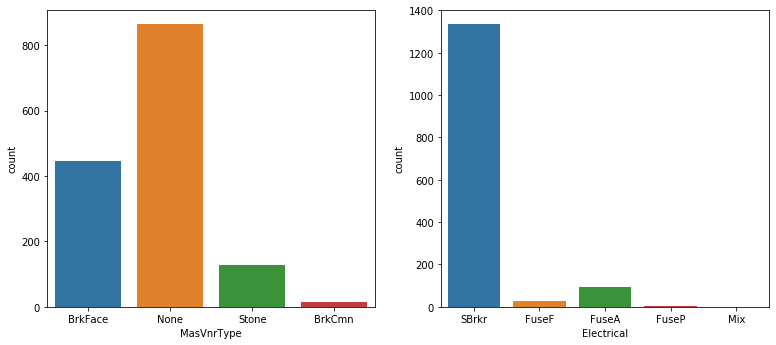

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'MasVnrType', data = surp)

plt.subplot(2,3,2)
sns.countplot(x = 'Electrical', data = surp)
plt.show()

* We can see the top option for MasVnrType is "None". So we will replace the missing value with it. If the MasVnrType is none then MasVnrArea automatically becomes zero.
* For Electrical we will impute with "SBrkr" which has the highest occurence.

In [10]:
surp['MasVnrType'] = surp['MasVnrType'].replace(np.nan, 'None')
surp['MasVnrArea'] = surp['MasVnrArea'].replace(np.nan, 0)
surp['Electrical'] = surp['Electrical'].replace(np.nan, 'SBrkr')

In [11]:
percent_missing = (surp.isnull().sum() / surp.isnull().count()*100).sort_values(ascending = False)
percent_missing

SalePrice        0.0
Foundation       0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
BsmtQual         0.0
SaleCondition    0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
RoofStyle        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

### Now we have treated all the missing values. Let us now explore the data.

Let us convert YearBuilt, YearRemodAdd, GarageYrBlt and YrSold from year to age where we are going to fill these columns with number. <br />
Example:  suppose the YearBuilt=2000 , Then the new YearBuilt = 2021-2000 =21 [using datetime to put the current year by default]

In [12]:
surp['YearBuilt'] = datetime.datetime.now().year - surp['YearBuilt']
surp['YearRemodAdd'] = datetime.datetime.now().year - surp['YearRemodAdd']
surp['GarageYrBlt'] = datetime.datetime.now().year - surp['GarageYrBlt']
surp['YrSold'] = datetime.datetime.now().year - surp['YrSold']
surp['GarageYrBlt']=surp['GarageYrBlt'].replace({-1:0})

Since we are already calculating the number of years, variable "MoSold" is now not relevant for our analysis. lets drop it.

In [13]:
surp.drop(['MoSold'],axis=1,inplace=True)

* MSSubClass is basically categorical variables. So lets map it with corresponding texts with help from data dictionary

In [14]:
surp['MSSubClass']=surp['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

* Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [15]:
surp[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [16]:
surp['LandSlope'] = surp.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
surp['ExterQual'] = surp.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
surp['BsmtQual'] = surp.BsmtQual.map({'No_Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
surp['BsmtCond'] = surp.BsmtCond.map({'No_Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
surp['BsmtExposure'] = surp.BsmtExposure.map({'No_Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
surp['BsmtFinType1'] = surp.BsmtFinType1.map({'No_Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
surp['BsmtFinType2'] = surp.BsmtFinType2.map({'No_Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
surp['HeatingQC'] = surp.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
surp['CentralAir'] = surp.CentralAir.map({'N':0,'Y':1})
surp['KitchenQual'] = surp.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
surp['GarageFinish'] = surp.GarageFinish.map({'No_Garage':0,'Unf':1,'RFn':2,'Fin':3})
surp['GarageQual'] = surp.GarageQual.map({'No_Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
surp['GarageCond'] = surp.GarageCond.map({'No_Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
surp['ExterCond'] = surp.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
surp['LotShape'] = surp.LotShape.map({'IR1':1,'IR2':2,'IR3':3,'Reg':4})
surp['FireplaceQu']=surp['FireplaceQu'].replace({ 'No_Fireplace': 0, 'Po': 1,'Fa': 2, 'TA': 3, 'Gd': 4,'Ex': 5})

In [17]:
surp[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,4
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,4
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,1
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,1
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,1


**Creating Derived Features:**

BsmtFullBath, BsmtHalfBath, FullBath, HalfBath all four of these basically indicates number of bathrooms. Let us merge them and create a single variable "Bath" using below formula:<br />
<b>Bath = FullBath + (0.75 x HalfBath) + (0.5 x BsmtFullBath) + (0.25 x BsmtHalfBath)

In [18]:
surp[['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']].head(15) # Checking the column before change

,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath
0,2,1,1,0
1,2,0,0,1
2,2,1,1,0
3,1,0,1,0
4,2,1,1,0
5,1,1,1,0
6,2,0,1,0
7,2,1,1,0
8,2,0,0,0
9,1,0,1,0


In [19]:
# Applying the formula
surp['Bath'] = surp['FullBath'] + (0.75 * surp['HalfBath']) + (0.5 * surp['BsmtFullBath']) + (0.25 * surp['BsmtHalfBath'])
surp[['Bath','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']].head(15)

,Bath,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath
0,3.25,2,1,1,0
1,2.25,2,0,0,1
2,3.25,2,1,1,0
3,1.50,1,0,1,0
4,3.25,2,1,1,0
5,2.25,1,1,1,0
6,2.50,2,0,1,0
7,3.25,2,1,1,0
8,2.00,2,0,0,0
9,1.50,1,0,1,0


In [20]:
#dropping the unnecessary columns
surp.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'],axis=1,inplace=True)

similarly using FireplaceQu and Fireplaces to create a new variable Fireplace using below formula:<br />
<b>Fireplace = FireplaceQu x Fireplaces

In [21]:
#Applying Formula
surp['Fireplace'] = surp['FireplaceQu'] * surp['Fireplaces']

In [22]:
surp[['Fireplace','FireplaceQu','Fireplaces']].head(15)

,Fireplace,FireplaceQu,Fireplaces
0,0,0,0
1,3,3,1
2,3,3,1
3,4,4,1
4,3,3,1
5,0,0,0
6,4,4,1
7,6,3,2
8,6,3,2
9,6,3,2


In [23]:
#dropping the unnecessary columns
surp.drop(['Fireplace','FireplaceQu','Fireplaces'],axis=1,inplace=True)

using WoodDeckSF,  OpenPorchSF, EnclosedPorch, 3SsnPorch, and ScreenPorch to create a new variable "PorchDeck" using below formula:<br />
<b>PorchDeck = WoodDeckSF + OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch

In [24]:
# Visualizing before change
surp[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].head(15)

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,0,61,0,0,0
1,298,0,0,0,0
2,0,42,0,0,0
3,0,35,272,0,0
4,192,84,0,0,0
5,40,30,0,320,0
6,255,57,0,0,0
7,235,204,228,0,0
8,90,0,205,0,0
9,0,4,0,0,0


In [25]:
#Applying Formula
surp['PorchDeck'] = surp['WoodDeckSF'] + surp['OpenPorchSF'] + surp['EnclosedPorch'] + surp['3SsnPorch'] + surp['ScreenPorch']
surp[['PorchDeck','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].head(15)

,PorchDeck,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,61,0,61,0,0,0
1,298,298,0,0,0,0
2,42,0,42,0,0,0
3,307,0,35,272,0,0
4,276,192,84,0,0,0
5,390,40,30,0,320,0
6,312,255,57,0,0,0
7,667,235,204,228,0,0
8,295,90,0,205,0,0
9,4,0,4,0,0,0


In [26]:
#dropping the unnecessary columns
surp.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1,inplace=True)

using LotFrontage,  LotArea and LotShape to create a new variable "LotChar" using below formula:<br />
<b>LotChar = (LotArea x LotShape) + LotFrontage

In [27]:
surp[['LotFrontage','LotArea','LotShape']].head(15)

,LotFrontage,LotArea,LotShape
0,65.0,8450,4
1,80.0,9600,4
2,68.0,11250,1
3,60.0,9550,1
4,84.0,14260,1
5,85.0,14115,1
6,75.0,10084,4
7,0.0,10382,1
8,51.0,6120,4
9,50.0,7420,4


In [28]:
surp['LotChar'] = (surp['LotArea'] * surp['LotShape']) + surp['LotFrontage']
surp[['LotChar', 'LotFrontage','LotArea','LotShape']].head(15)

,LotChar,LotFrontage,LotArea,LotShape
0,33865.0,65.0,8450,4
1,38480.0,80.0,9600,4
2,11318.0,68.0,11250,1
3,9610.0,60.0,9550,1
4,14344.0,84.0,14260,1
5,14200.0,85.0,14115,1
6,40411.0,75.0,10084,4
7,10382.0,0.0,10382,1
8,24531.0,51.0,6120,4
9,29730.0,50.0,7420,4


In [29]:
surp.drop(['LotFrontage','LotArea','LotShape'],axis=1,inplace=True)

using GarageFinish, GarageCond and GarageQual to create a new variable "GarageQuality" using below formula:<br />
<b> Garage = GarageFinish + GarageQual + GarageCond

In [30]:
surp[['GarageFinish', 'GarageCond', 'GarageQual']].head(15)

,GarageFinish,GarageCond,GarageQual
0,2,3,3
1,2,3,3
2,2,3,3
3,1,3,3
4,2,3,3
5,1,3,3
6,2,3,3
7,2,3,3
8,1,3,2
9,2,3,4


In [31]:
surp['Garage'] = (surp['GarageFinish'] + surp['GarageQual'] + surp['GarageCond'])

In [32]:
surp[['Garage', 'GarageFinish', 'GarageQual', 'GarageCond']].head(15)

,Garage,GarageFinish,GarageQual,GarageCond
0,8,2,3,3
1,8,2,3,3
2,8,2,3,3
3,7,1,3,3
4,8,2,3,3
5,7,1,3,3
6,8,2,3,3
7,8,2,3,3
8,6,1,2,3
9,9,2,4,3


In [33]:
surp.drop(['GarageFinish', 'GarageCond', 'GarageQual'],axis=1,inplace=True)

In [34]:
surp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   Street         1460 non-null   object 
 3   LandContour    1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   int64  
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

<b>Let us treat the outliers now. We will be taking the lower and upper quantile as 0.25 & 0.99 respectively. <br /> But before that lets have a quick look at the stats and using boxplots.

In [35]:
surp.describe()

,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,PoolArea,MiscVal,YrSold,SalePrice,Bath,PorchDeck,LotChar,Garage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.062329,6.099315,5.575342,49.732192,36.134247,103.117123,2.39589,2.083562,3.489041,2.934932,1.630137,3.545890,443.639726,1.247260,46.549315,567.240411,1057.429452,3.145205,0.934932,1162.626712,346.992466,5.844521,1515.463699,2.866438,1.046575,2.511644,6.517808,40.136301,1.767123,472.980137,2.758904,43.489041,13.184247,180921.195890,2.079281,181.329452,28679.441096,7.334932
std,0.276232,1.382997,1.112799,30.202904,20.645407,180.731373,0.57428,0.351054,0.876478,0.552159,1.067391,2.107776,456.098091,0.892332,161.319273,441.866955,438.705324,0.959501,0.246731,386.587738,436.528436,48.623081,525.480383,0.815778,0.220338,0.663760,1.625393,25.892617,0.747315,213.804841,40.177307,496.123024,1.328095,79442.502883,0.734917,156.656097,26279.801034,2.019307
min,0.000000,1.000000,1.000000,11.000000,11.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,34900.000000,0.500000,0.000000,3136.000000,0.000000
25%,0.000000,5.000000,5.000000,21.000000,17.000000,0.000000,2.00000,2.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,795.750000,2.000000,1.000000,882.000000,0.000000,0.000000,1129.500000,2.000000,1.000000,2.000000,5.000000,18.000000,1.000000,334.500000,0.000000,0.000000,12.000000,129975.000000,1.500000,45.000000,11762.250000,7.000000
50%,0.000000,6.000000,5.000000,48.000000,27.000000,0.000000,2.00000,2.000000,4.000000,3.000000,1.000000,4.000000,383.500000,1.000000,0.000000,477.500000,991.500000,4.000000,1.000000,1087.000000,0.000000,0.000000,1464.000000,3.000000,1.000000,2.000000,6.000000,36.500000,2.000000,480.000000,0.000000,0.000000,13.000000,163000.000000,2.000000,164.000000,28178.000000,8.000000
75%,0.000000,7.000000,6.000000,67.000000,54.000000,164.250000,3.00000,2.000000,4.000000,3.000000,2.000000,6.000000,712.250000,1.000000,0.000000,808.000000,1298.250000,4.000000,1.000000,1391.250000,728.000000,0.000000,1776.750000,3.000000,1.000000,3.000000,7.000000,59.000000,2.000000,576.000000,0.000000,0.000000,14.000000,214000.000000,2.750000,266.000000,38480.000000,8.000000
max,2.000000,10.000000,9.000000,149.000000,71.000000,1600.000000,4.00000,4.000000,5.000000,4.000000,4.000000,6.000000,5644.000000,6.000000,1474.000000,2336.000000,6110.000000,4.000000,1.000000,4692.000000,2065.000000,572.000000,5642.000000,8.000000,3.000000,4.000000,14.000000,121.000000,4.000000,1418.000000,738.000000,15500.000000,15.000000,755000.000000,4.500000,1027.000000,645885.000000,13.000000


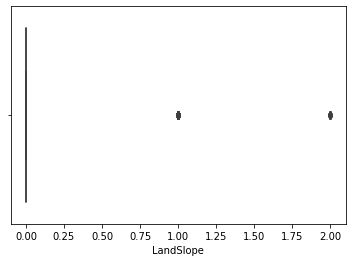

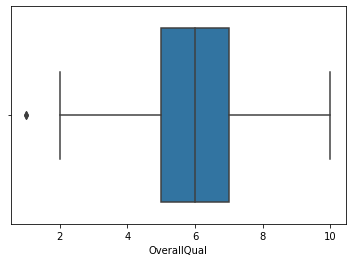

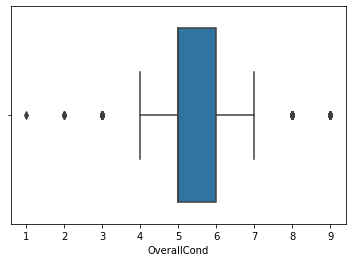

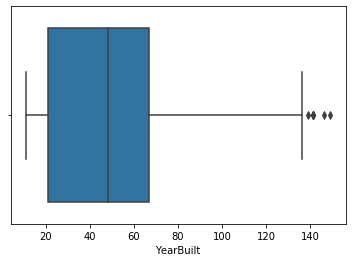

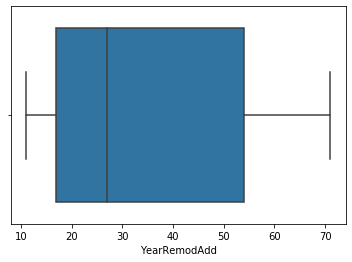

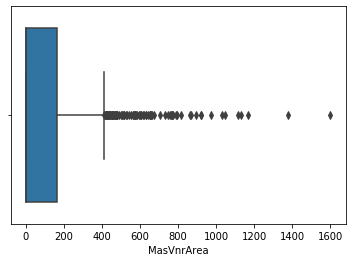

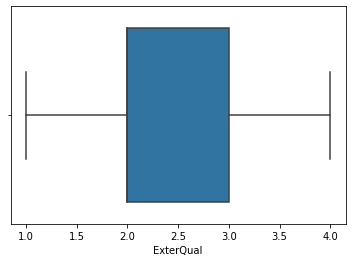

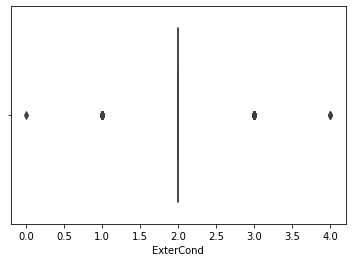

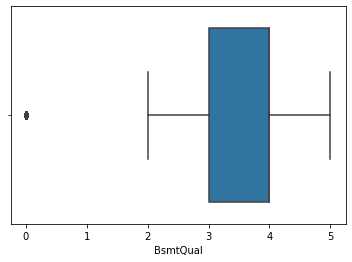

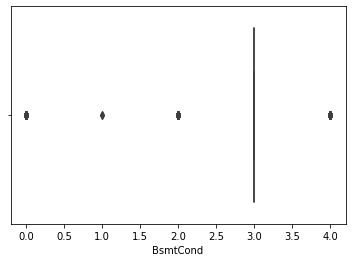

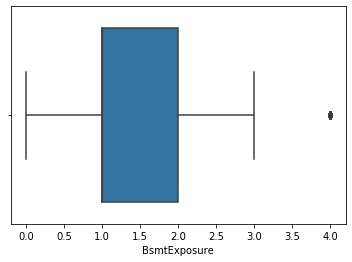

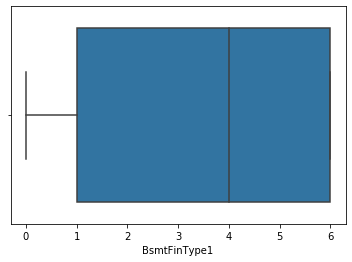

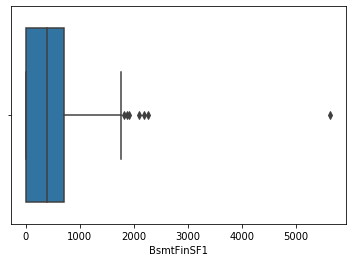

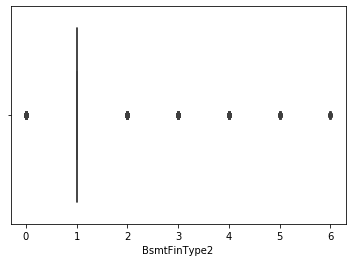

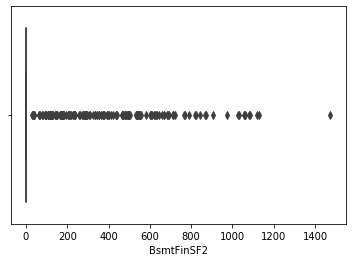

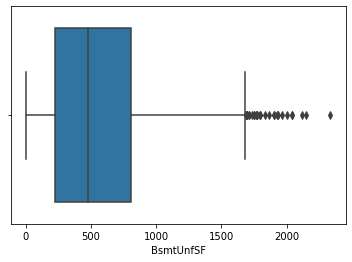

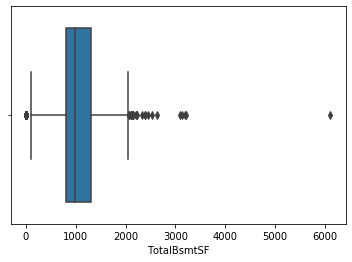

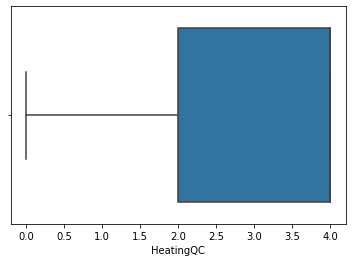

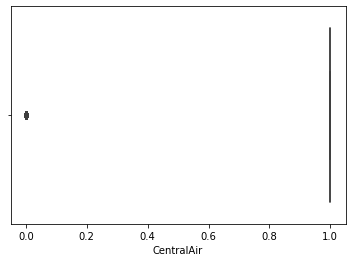

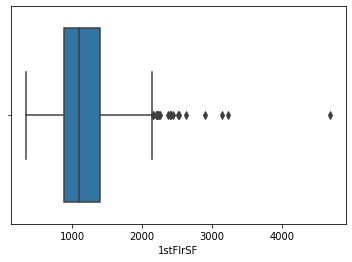

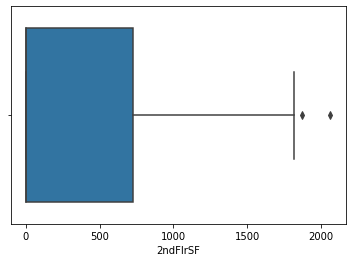

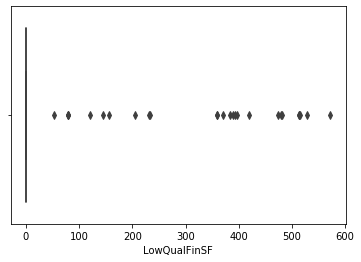

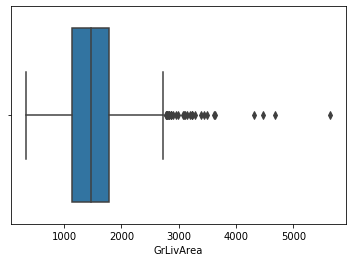

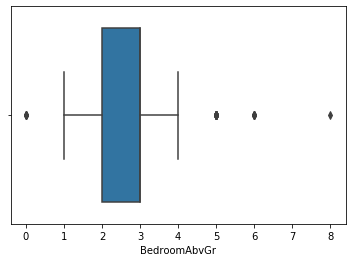

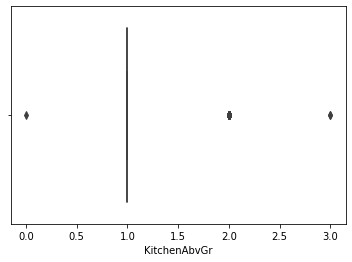

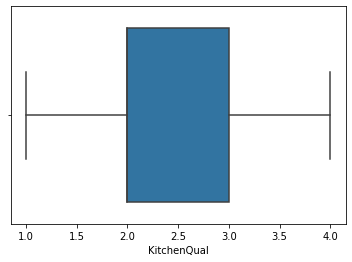

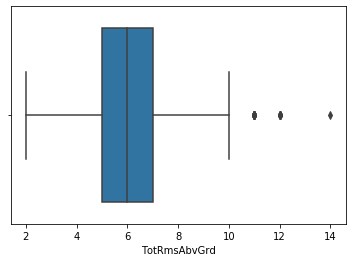

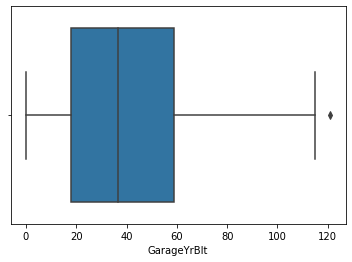

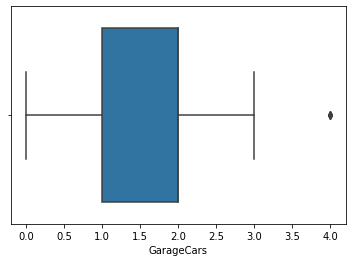

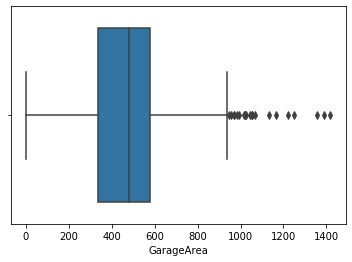

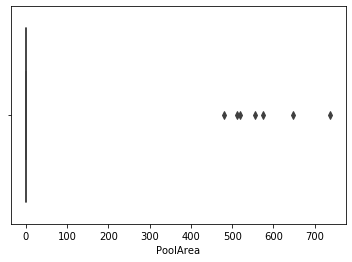

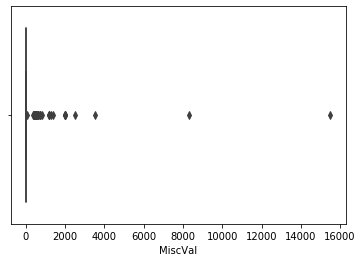

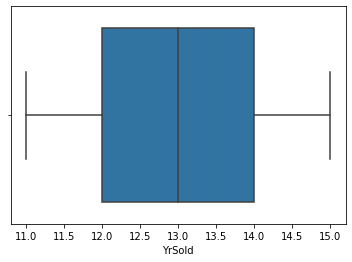

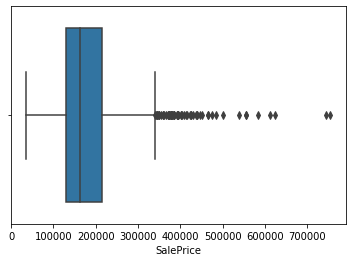

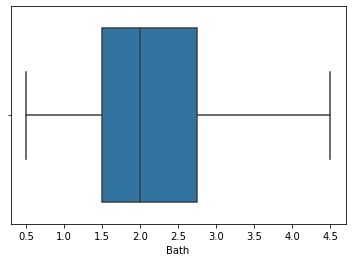

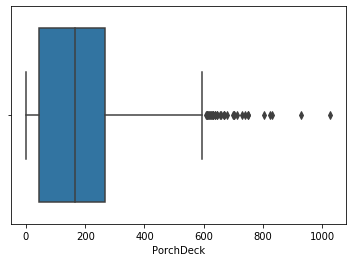

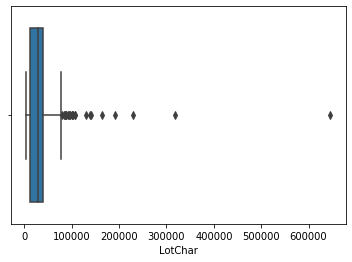

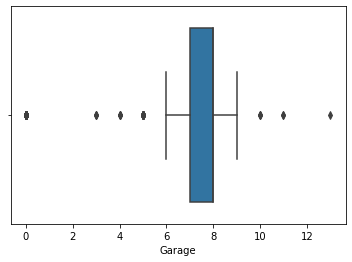

In [36]:
#Creating boxplt for analysis
surp_numeric = surp.select_dtypes(include=['float64', 'int64'])
for i in surp_numeric:
    sns.boxplot(surp[i])
    plt.show()
    

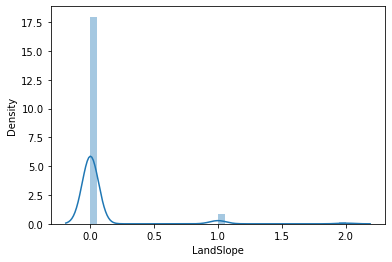

 Skewness: 4.813682
 Kustosis: 24.597605


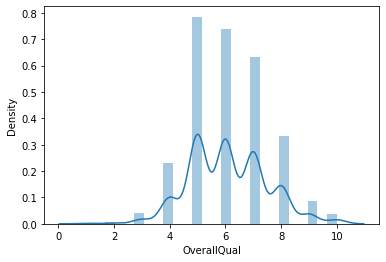

 Skewness: 0.216944
 Kustosis: 0.096293


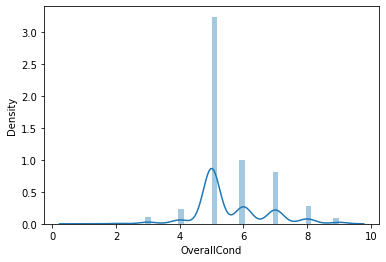

 Skewness: 0.693067
 Kustosis: 1.106413


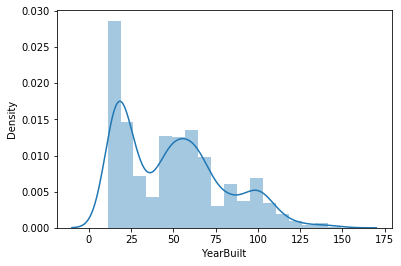

 Skewness: 0.613461
 Kustosis: -0.439552


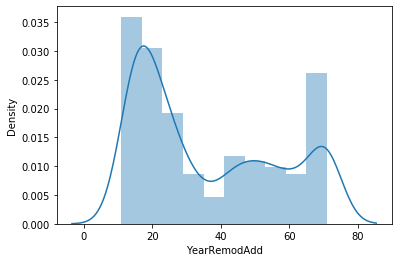

 Skewness: 0.503562
 Kustosis: -1.272245


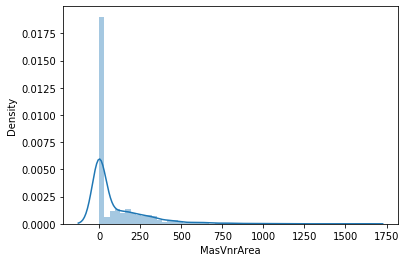

 Skewness: 2.677616
 Kustosis: 10.141416


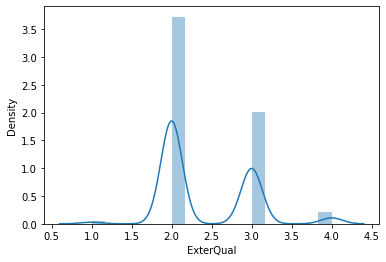

 Skewness: 0.825988
 Kustosis: 0.060816


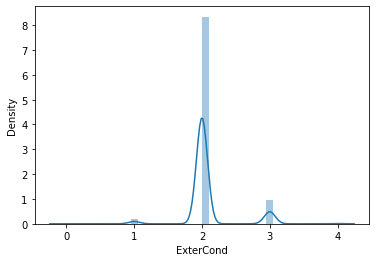

 Skewness: 1.397219
 Kustosis: 6.100074


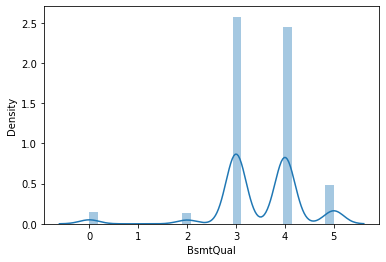

 Skewness: -1.287571
 Kustosis: 4.416646


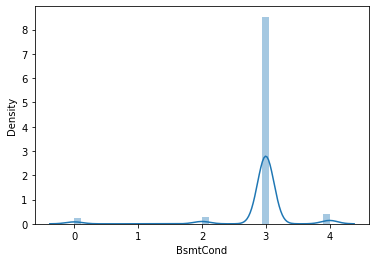

 Skewness: -3.701033
 Kustosis: 18.402244


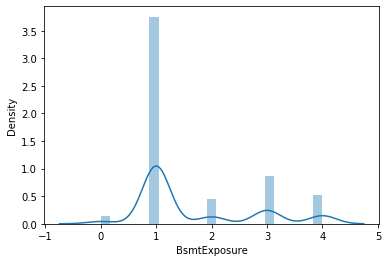

 Skewness: 1.102968
 Kustosis: -0.129545


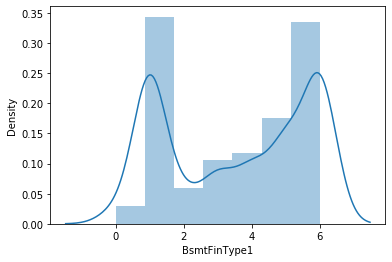

 Skewness: -0.159177
 Kustosis: -1.594005


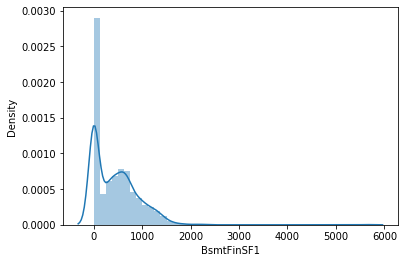

 Skewness: 1.685503
 Kustosis: 11.118236


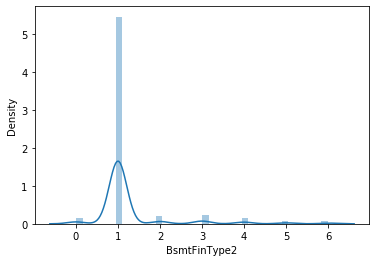

 Skewness: 3.296996
 Kustosis: 11.569309


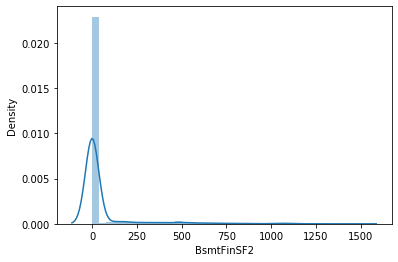

 Skewness: 4.255261
 Kustosis: 20.113338


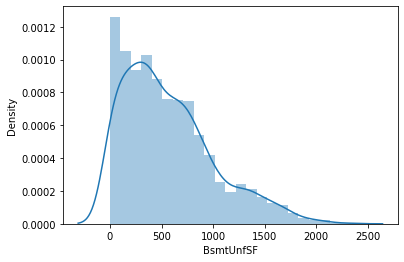

 Skewness: 0.920268
 Kustosis: 0.474994


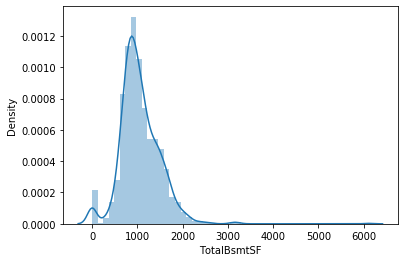

 Skewness: 1.524255
 Kustosis: 13.250483


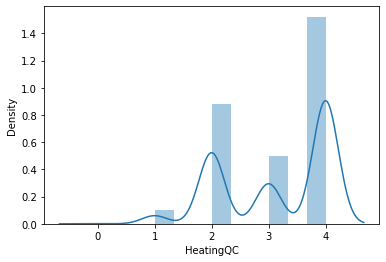

 Skewness: -0.540458
 Kustosis: -1.165044


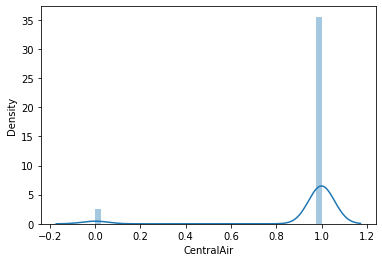

 Skewness: -3.530386
 Kustosis: 10.477974


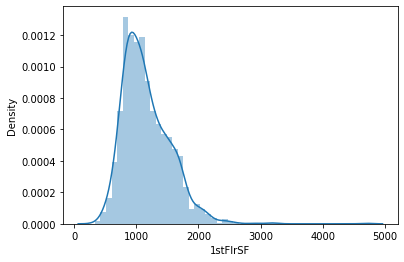

 Skewness: 1.376757
 Kustosis: 5.745841


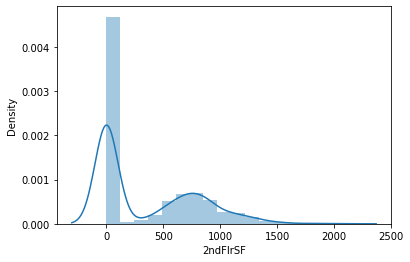

 Skewness: 0.813030
 Kustosis: -0.553464


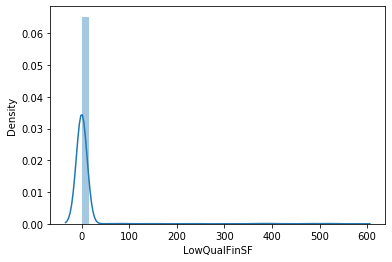

 Skewness: 9.011341
 Kustosis: 83.234817


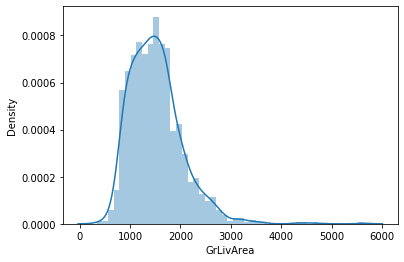

 Skewness: 1.366560
 Kustosis: 4.895121


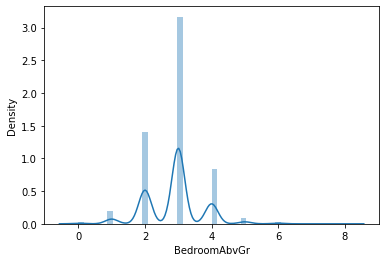

 Skewness: 0.211790
 Kustosis: 2.230875


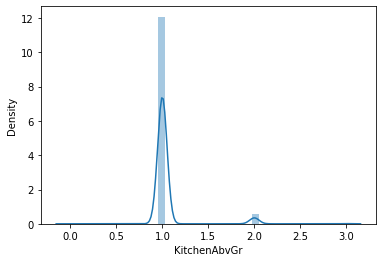

 Skewness: 4.488397
 Kustosis: 21.532404


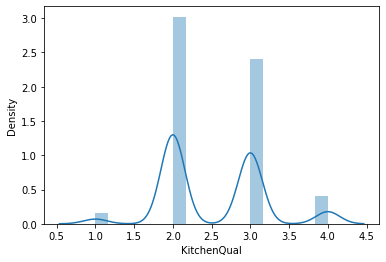

 Skewness: 0.386765
 Kustosis: -0.247537


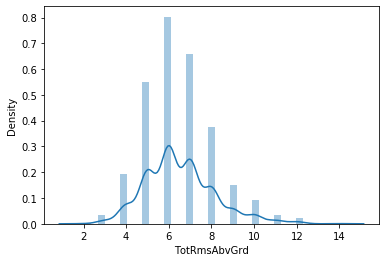

 Skewness: 0.676341
 Kustosis: 0.880762


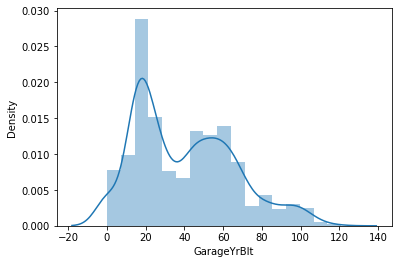

 Skewness: 0.560286
 Kustosis: -0.426721


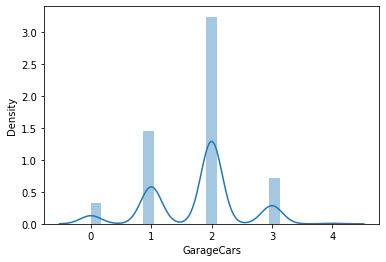

 Skewness: -0.342549
 Kustosis: 0.220998


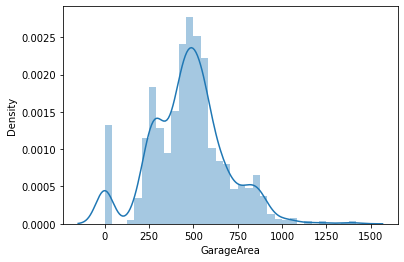

 Skewness: 0.179981
 Kustosis: 0.917067


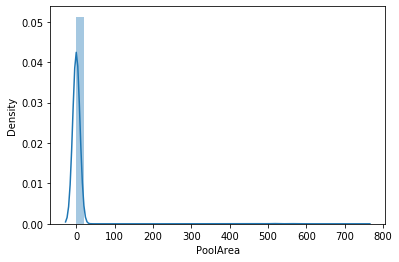

 Skewness: 14.828374
 Kustosis: 223.268499


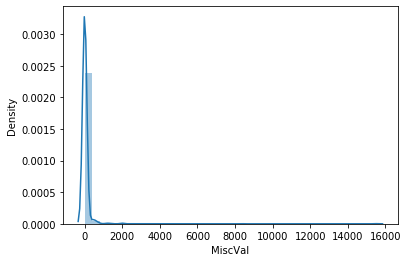

 Skewness: 24.476794
 Kustosis: 701.003342


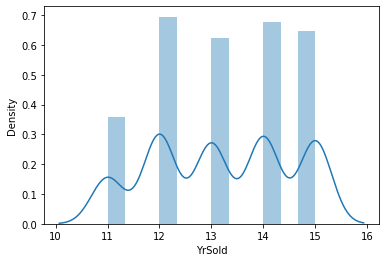

 Skewness: -0.096269
 Kustosis: -1.190601


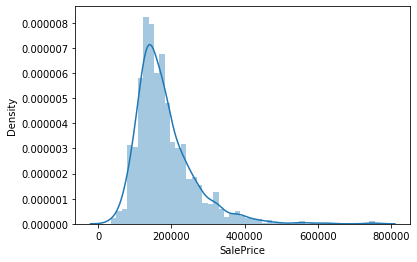

 Skewness: 1.882876
 Kustosis: 6.536282


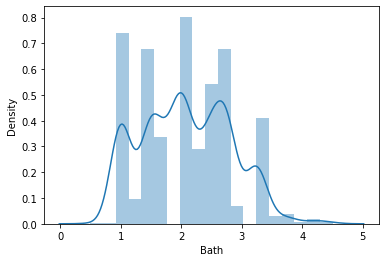

 Skewness: 0.218717
 Kustosis: -0.609795


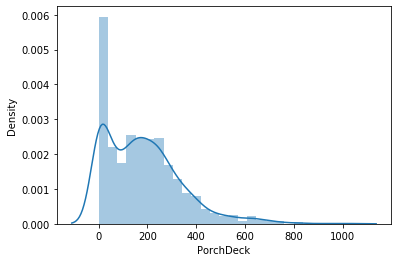

 Skewness: 1.102313
 Kustosis: 1.764561


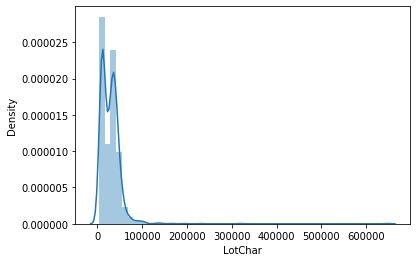

 Skewness: 10.713502
 Kustosis: 221.735325


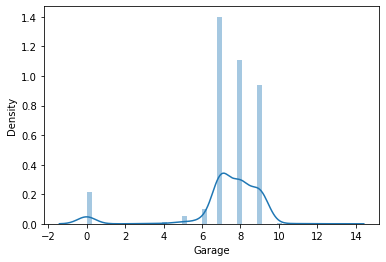

 Skewness: -2.551638
 Kustosis: 6.973611


In [37]:
#checking skewness and kurtosis in the data
surp_numeric = surp.select_dtypes(include=['float64', 'int64'])
for i in surp_numeric:
    sns.distplot(surp[i])
    plt.show()
    print("\033[1m Skewness:\033[0m %f" % surp[i].skew())
    print("\033[1m Kustosis:\033[0m %f" % surp[i].kurt())

After analyzing the plots we can clearly see that we can use below variables for treating outliers.
* LotChar
* MasVnrArea
* BsmtFinSF1
* BsmtFinSF2
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* PorchDeck
* MiscVal
* SalePrice

We have created a custom function that will treat the outliers.

In [38]:
num_col = ['LotChar','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF', 'GrLivArea', 'PorchDeck' ,'MiscVal','SalePrice']

def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

surp = drop_outliers(surp)

In [39]:
print("Percentage of data lost after oulier treatment: " + str((1-(surp.shape[0]/1460))*100))

Percentage of data lost after oulier treatment: 0.8219178082191747


So we lost only 0.82% of data and still have sufficient amount of data remaining after outlier treatment.

#### Now having treated all the missing values , taken care of the outlier and created some derived variables. Let's check and explore the dependent variable i.e SalePrice

In [40]:
#descriptive statistics summary
surp['SalePrice'].describe()

count      1448.000000
mean     180634.078729
std       79324.106603
min       34900.000000
25%      129900.000000
50%      162950.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

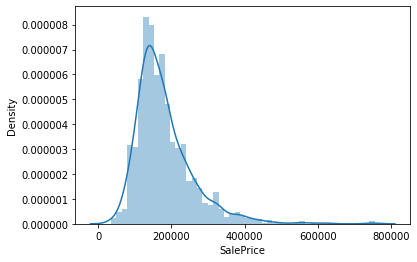

 Skewness: 1.904791


In [41]:
sns.distplot(surp['SalePrice'])
plt.show()
print("\033[1m Skewness:\033[0m %f" % surp['SalePrice'].skew())

Above plot shows that the data is skewed. Let us use <b>log transform</b> to transform the data.

In [42]:
surp['SalePrice']=np.log(surp.SalePrice) #tranforming to form normal disribution

In [43]:
surp['SalePrice'].describe()

count    1448.000000
mean       12.022777
std         0.398300
min        10.460242
25%        11.774520
50%        12.001199
75%        12.271392
max        13.534473
Name: SalePrice, dtype: float64

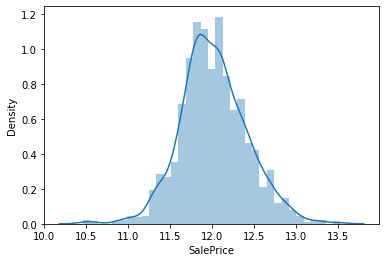

 Skewness: 0.135545


In [44]:
sns.distplot(surp['SalePrice'])
plt.show()
print("\033[1m Skewness:\033[0m %f" % surp['SalePrice'].skew())

In [45]:
surp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1448 non-null   object 
 1   MSZoning       1448 non-null   object 
 2   Street         1448 non-null   object 
 3   LandContour    1448 non-null   object 
 4   Utilities      1448 non-null   object 
 5   LotConfig      1448 non-null   object 
 6   LandSlope      1448 non-null   int64  
 7   Neighborhood   1448 non-null   object 
 8   Condition1     1448 non-null   object 
 9   Condition2     1448 non-null   object 
 10  BldgType       1448 non-null   object 
 11  HouseStyle     1448 non-null   object 
 12  OverallQual    1448 non-null   int64  
 13  OverallCond    1448 non-null   int64  
 14  YearBuilt      1448 non-null   int64  
 15  YearRemodAdd   1448 non-null   int64  
 16  RoofStyle      1448 non-null   object 
 17  RoofMatl       1448 non-null   object 
 18  Exterior

#### We can say that now Dependent variable SalePrice is normally distributed.

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

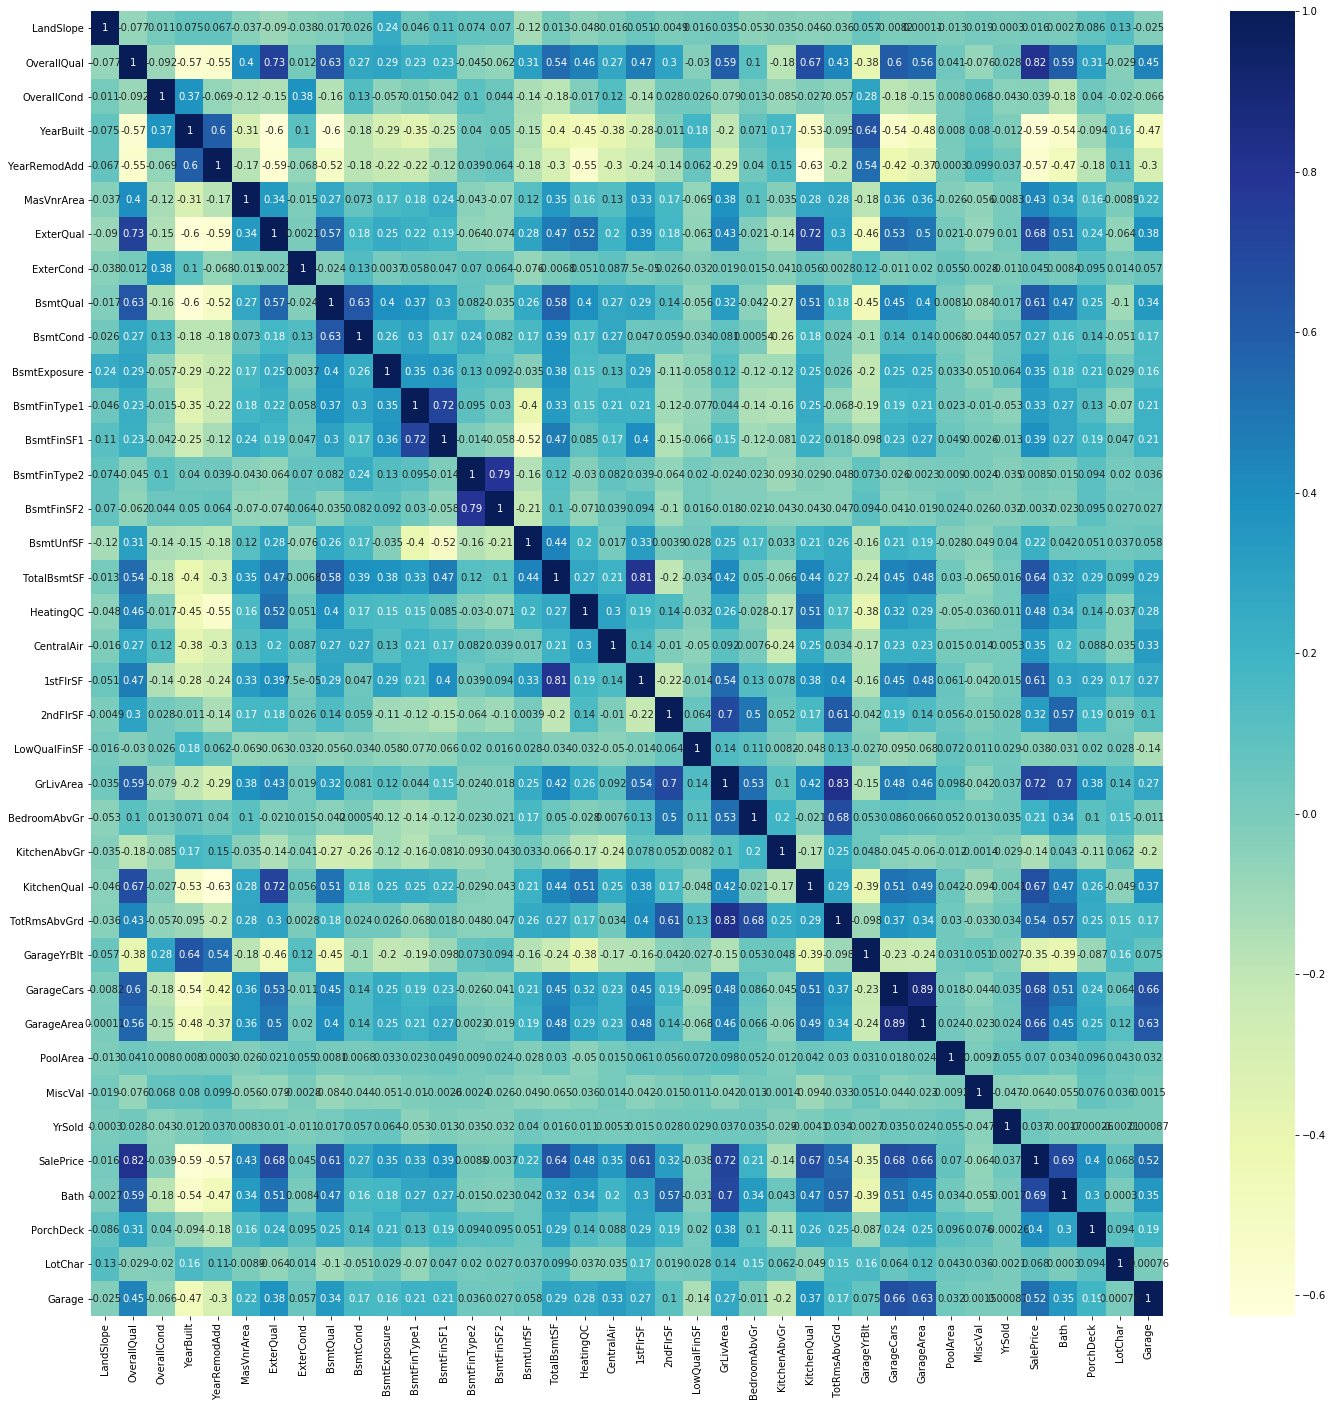

In [46]:
surp_numeric = surp.select_dtypes(include=['float64', 'int64'])
cor = surp_numeric.corr()
plt.figure(figsize=(24,24))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

###### Above Heatmap Shows some interesting observations:
SalePrice has high positive correlation with:
* OverallQual
* MasVnrArea
* ExterQual
* BsmtQual
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* KitchenQual
* TotRmsAbvGrd
* GarageCars
* GarageArea
* Bath

SalePrice has high negative correlation with:
* YearBuilt
* YearRemodAdd
* GarageYrBlt

## Exploratory Data Analysis
### Let's check all the Categorical columns and their effect on price


In [47]:
Cat = surp.select_dtypes(include=['object'])
cat_columns = Cat.columns
cat_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

#### As we have many columns so let's make groups randomly and visualize them. We would be making two graphs to understand firstly the countplot and secondaly effect of that variable on dependent variable i.e. SalePrice.

Group One : 'MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities'<br />
Group Two : 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType'<br />
Group Three : 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'<br />
Group Four : 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional'<br />
Group Five : 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'<br />

##### Checking Group One

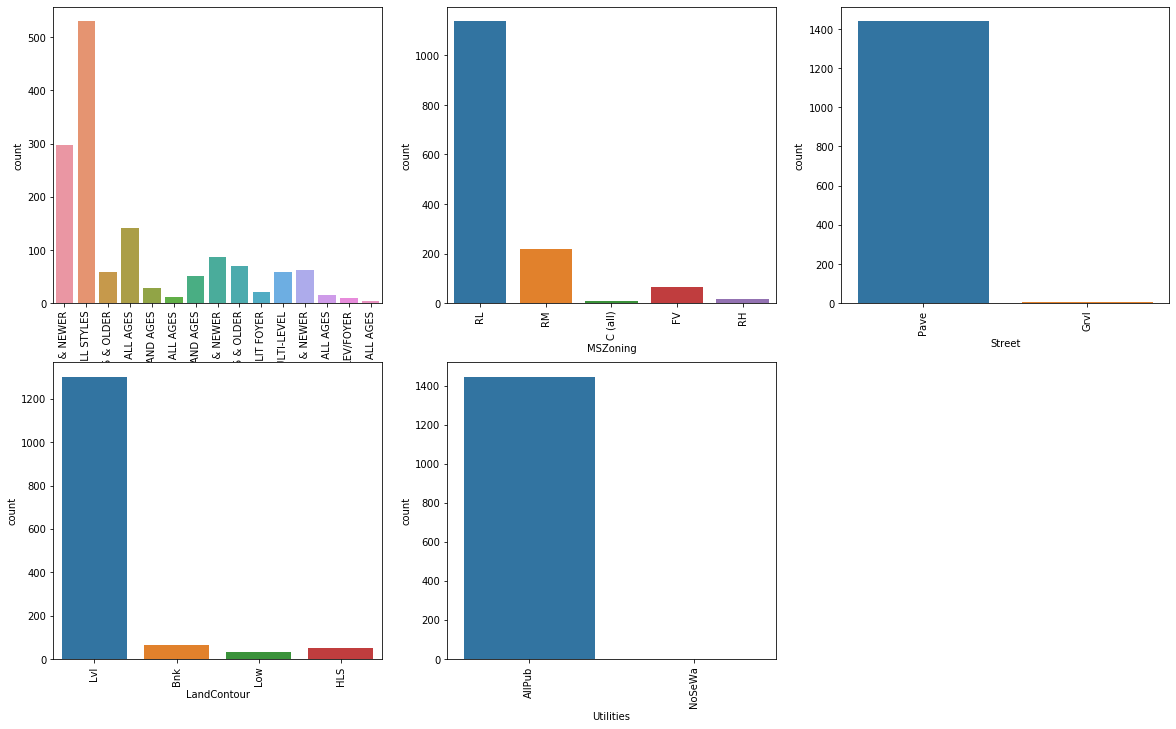

In [48]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'MSSubClass',  data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x = 'MSZoning', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'Street', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'LandContour', data = surp)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'Utilities',  data = surp)
plt.xticks(rotation=90)


plt.show()

##### Checking Group Two

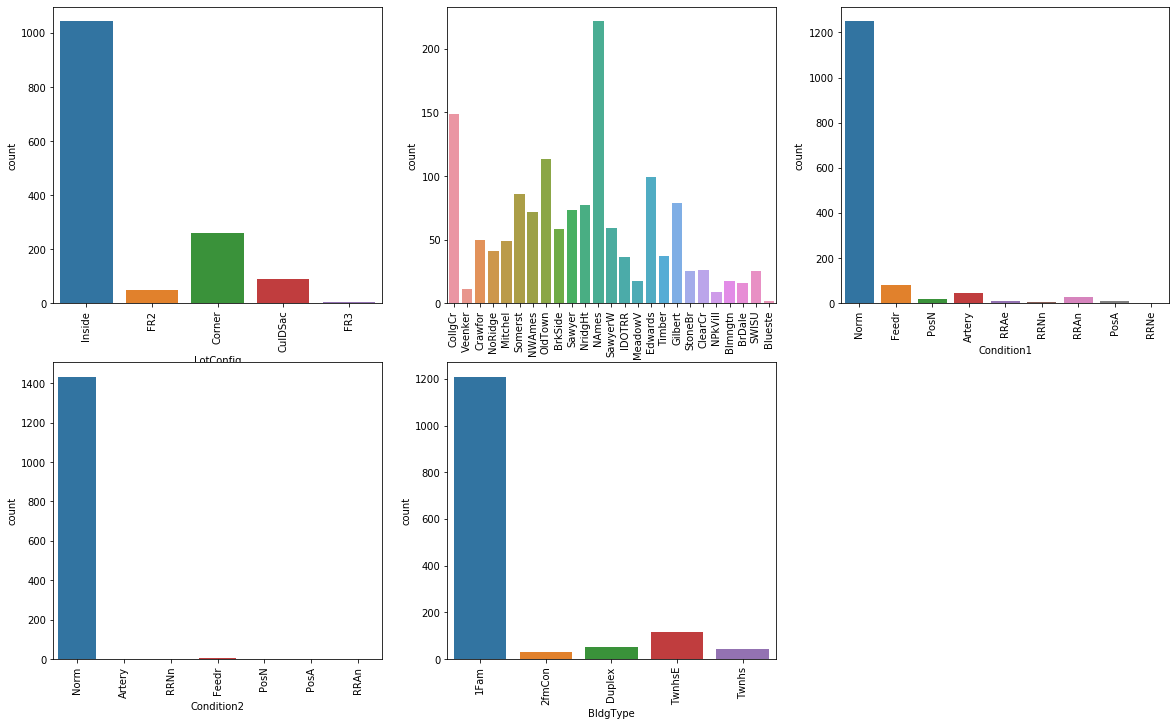

In [49]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LotConfig',  data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x = 'Neighborhood', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'Condition1', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition2', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'BldgType',  data = surp)
plt.xticks(rotation=90)
plt.show()

##### Checking Group Three

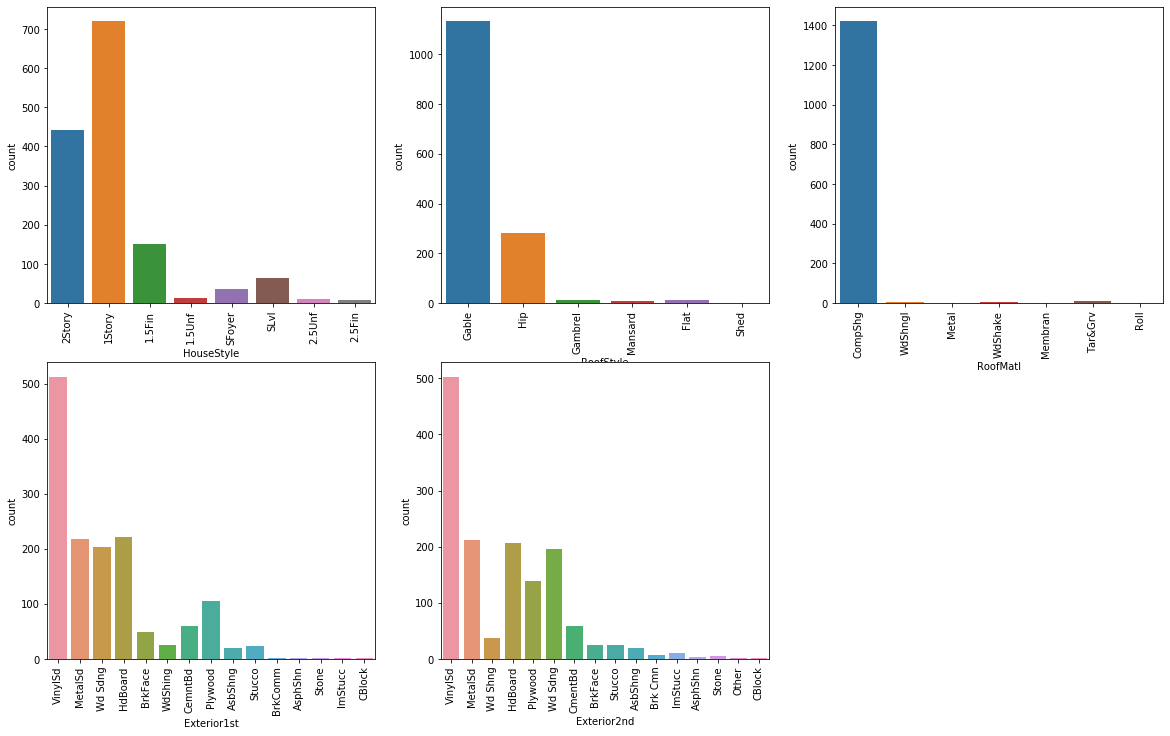

In [50]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = surp)
plt.xticks(rotation=90)
plt.show()

##### Checking Group Four

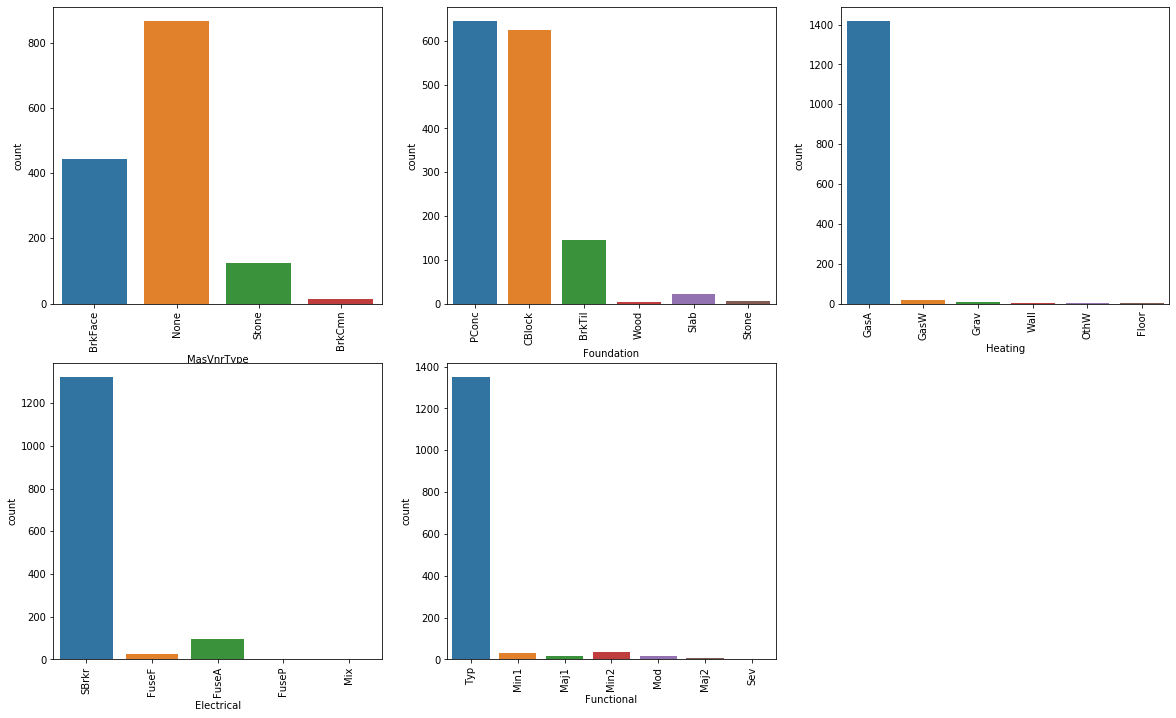

In [51]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'MasVnrType',  data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x = 'Foundation', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'Heating', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Functional',  data = surp)
plt.xticks(rotation=90)
plt.show()

##### Checking Group Five

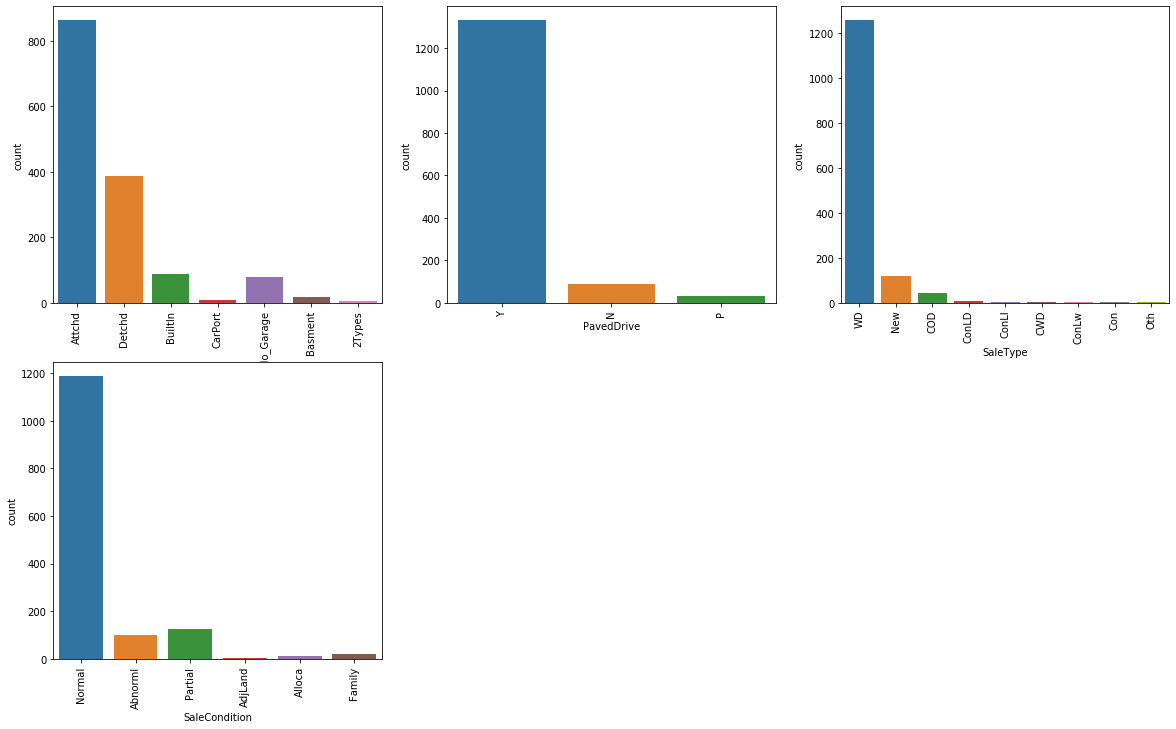

In [52]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x = 'PavedDrive', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'SaleType', data = surp)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'SaleCondition', data = surp)
plt.xticks(rotation=90)
plt.show()

From above plots it is clearly visible that below variables are highly skewed:
- Utilities
- Street
- Condition1
- Condition2
- RoofMatl
- Heating
- Functional
- Electrical
- SaleType

In [53]:
surp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1448 non-null   object 
 1   MSZoning       1448 non-null   object 
 2   Street         1448 non-null   object 
 3   LandContour    1448 non-null   object 
 4   Utilities      1448 non-null   object 
 5   LotConfig      1448 non-null   object 
 6   LandSlope      1448 non-null   int64  
 7   Neighborhood   1448 non-null   object 
 8   Condition1     1448 non-null   object 
 9   Condition2     1448 non-null   object 
 10  BldgType       1448 non-null   object 
 11  HouseStyle     1448 non-null   object 
 12  OverallQual    1448 non-null   int64  
 13  OverallCond    1448 non-null   int64  
 14  YearBuilt      1448 non-null   int64  
 15  YearRemodAdd   1448 non-null   int64  
 16  RoofStyle      1448 non-null   object 
 17  RoofMatl       1448 non-null   object 
 18  Exterior

### Creating Dummy Variables for categorical values

In [54]:
Cat1 = surp.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
Num = surp.select_dtypes(include=['int64','float64']) #all numerical variables
Num.columns

Index(['LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PoolArea', 'MiscVal', 'YrSold',
       'SalePrice', 'Bath', 'PorchDeck', 'LotChar', 'Garage'],
      dtype='object')

In [56]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1448, 160)


In [57]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,...,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [58]:
# concat dummy variables with main dataset
surp = pd.concat([surp, Cat1], axis=1) 

In [59]:
surp.head()

,MSSubClass,MSZoning,Street,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageYrBlt,GarageCars,...,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,Pave,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,18,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,3,1,3,8,Typ,Attchd,18.0,2,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,45,45,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,2,CBlock,4,3,4,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,3,1,2,6,Typ,Attchd,45.0,2,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2-STORY 1946 & NEWER,RL,Pave,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,20,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3,2,PConc,4,3,2,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,3,1,3,6,Typ,Attchd,20.0,2,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,2-STORY 1945 & OLDER,RL,Pave,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,106,51,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,2,BrkTil,3,4,1,5,216,1,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,3,1,3,7,Typ,Detchd,23.0,3,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2-STORY 1946 & NEWER,RL,Pave,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,21,21,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3,2,PConc,4,3,3,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,4,1,3,9,Typ,Attchd,21.0,3,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [60]:
#removing columns as dummy variables already formed
surp.drop(['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition'],axis=1,inplace=True) 

In [61]:
surp.head()

,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,PoolArea,MiscVal,YrSold,SalePrice,Bath,PorchDeck,LotChar,Garage,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,...,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,7,5,18,18,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,3,1,3,8,18.0,2,548,0,0,13,12.247694,3.25,61,33865.0,8,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,6,8,45,45,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,3,1,2,6,45.0,2,460,0,0,14,12.109011,2.25,298,38480.0,8,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,7,5,20,19,162.0,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,3,1,3,6,20.0,2,608,0,0,13,12.317167,3.25,42,11318.0,8,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,7,5,106,51,0.0,2,2,3,4,1,5,216,1,0,540,756,3,1,961,756,0,1717,3,1,3,7,23.0,3,642,0,0,15,11.849398,1.50,307,9610.0,7,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,8,5,21,21,350.0,3,2,4,3,3,6,655,1,0,490,1145,4,1,1145,1053,0,2198,4,1,3,9,21.0,3,836,0,0,13,12.429216,3.25,276,14344.0,8,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [62]:
# Splitting the data into test and train
df_train,df_test = train_test_split(surp,train_size=0.7,random_state=42)

- Scaling the features is necessary before using Ridge or Lasso
- We will use fit_transform on train data so that we can scale the training data and also learn the scaling parameters of that data.
- These learned parameters are then used to scale our test data using transform directly.
- We will include our target variable SalePrice as well because even after log transform the scale is different.

In [63]:
cols = df_train.columns
scaler = StandardScaler()
df_train[cols] = scaler.fit_transform(df_train[cols])
df_test[cols] = scaler.transform(df_test[cols])

In [64]:
#### Spliting the dependent and independent variable
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

##  3. Model Building and Evaluation
- Ridge and Lasso Regression

#### Note:
- We will be using RFE and try to find the optimal number of feature
- We will use RFE with GridSearchCV as 197 variable with 5 folds will create 985 fit. So I am using RFE directly with 70 variables to get a substantial number of variables to work with.

In [65]:
pd.options.display.float_format = '{:.5f}'.format

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
print("\033[1m Below are the 70 best Variables selected by RFE:\033[0m \n",  rfe_sel_columns)

 Below are the 70 best Variables selected by RFE: 
 ['OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars', 'Bath', 'PorchDeck', 'LotChar', 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 'MSSubClass_2-STORY PUD - 1946 & NEWER', 'MSSubClass_DUPLEX - ALL STYLES AND AGES', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosN', 'Condition2_RRNn', 'BldgType_Duplex', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_Membran', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng', 'Exterior2nd_CBlock', 'Exterior2nd_Cme

In [67]:
# creating dataframe with RFE selected variables only
X_train_rfe = X_train[rfe_sel_columns]
X_test_rfe = X_test[rfe_sel_columns]

- Though we are focussing mainly on ridge and lasso regression let us try with Linear Regression once before we move on.

In [68]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

print(lm.intercept_)
print(lm.coef_)


5.7596567095393094e-05
[ 2.04413707e-01  1.03141066e-01 -1.22331201e-01  3.37418872e-02
  4.12753851e-02  1.62124226e+11  5.97052743e+10  1.65544377e+11
 -1.57856692e+11  3.48892212e-02  2.85654237e+11  3.25045923e+11
  3.55501400e+10 -3.80595093e+11 -5.63507080e-02  4.53453064e-02
  3.66439819e-02  1.02270126e-01  5.78384399e-02  4.95719910e-02
  2.94952393e-02  4.63523865e-02 -5.10787964e-02  2.39646038e+11
  3.40873718e-01  1.21976852e-01  5.53253174e-01  4.13642883e-01
  9.82162637e+08  4.08782959e-02  4.43401337e-02  3.22875977e-02
  7.06062317e-02 -3.51486206e-02  5.36117554e-02  5.12523651e-02
  3.68652344e-02 -8.89739990e-02  9.02176469e+08 -2.39646038e+11
 -5.88836670e-02 -5.39016724e-02 -1.74324124e+09 -2.88772583e-02
  2.94780731e-02 -9.89168302e+10 -6.47125244e-02 -6.79054260e-02
  9.89168302e+10  5.00030518e-02  1.81144880e+07  5.90438843e-02
  7.34100342e-02  9.81216431e-02  6.24084473e-02  3.62319946e-02
  4.78401184e-02  5.64250946e-02 -3.77120972e-02  1.56826230e+04
  

In [69]:
metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for training Data: ", r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for test Data: ", r2_test_lr)
metric1.append(r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error for training Data: ", mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for test Data: ",  mse_test_lr)
metric1.append(mse_test_lr**0.5)

R2 Score for training Data:  0.9304837159439634
R2 Score for test Data:  -1.3492275567746516e+16
Mean Squared Error for training Data:  0.06951628405603665
Mean Squared Error for test Data:  1.2946451457085576e+16


From the above Details we can clearly see that Linear Regression is not doing a good job. To get it done we will have to:
- Check P-Value and VIF of different variables.
- We will have to remove variables having P-Value >0.05 and VIF>10.
- Rebuild the model again.

To get an optimal result we will have to keep repeating above points. Which is quite a task even with 70 variables. So let's jump to ridge and lasso regression instead.

## Ridge Regression

We will build two models here.
- One with the data which has all the variables.
- Second one with the data which has RFE selected variables.

We will select the better one based on R2 and MSE score.

**> Now Building the model with complete data**

In [70]:
# list of hyper parameters to tune. If value too high it will lead to underfitting. 
#If it is too low, it will not handle the overfitting.

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [71]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_) 
alpha = model_cv.best_params_['alpha']

{'alpha': 100}


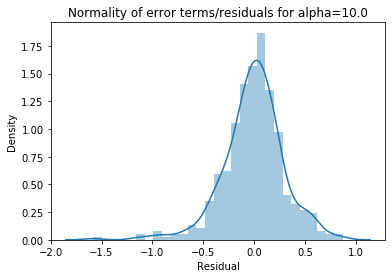

R2 Score for training Data:  0.9393539728779335
R2 Score for test Data:  0.90681891128663
Mean Squared Error for training Data:  0.06064602712206647
Mean Squared Error for test Data:  0.08941148849863856


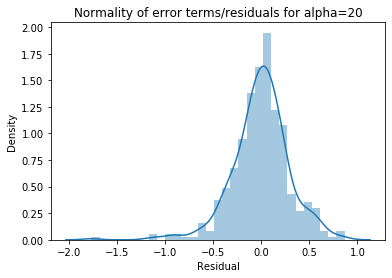

R2 Score for training Data:  0.9380423546921286
R2 Score for test Data:  0.9066134226750101
Mean Squared Error for training Data:  0.06195764530787144
Mean Squared Error for test Data:  0.08960866415829377


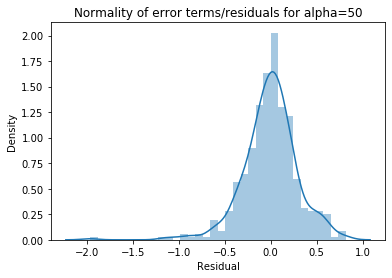

R2 Score for training Data:  0.9360073100275867
R2 Score for test Data:  0.9069696056201422
Mean Squared Error for training Data:  0.06399268997241321
Mean Squared Error for test Data:  0.08926689043852061


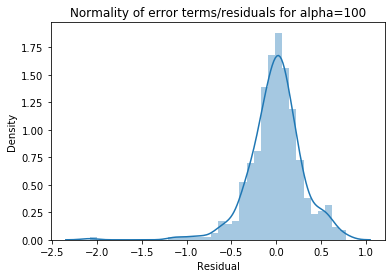

R2 Score for training Data:  0.933860875366193
R2 Score for test Data:  0.9078219943937623
Mean Squared Error for training Data:  0.06613912463380704
Mean Squared Error for test Data:  0.08844898468016071


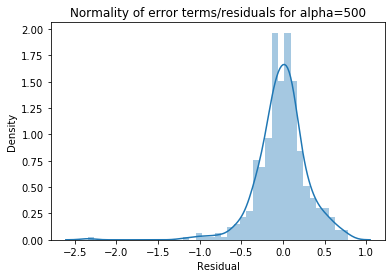

R2 Score for training Data:  0.920265530936166
R2 Score for test Data:  0.9055826326152716
Mean Squared Error for training Data:  0.07973446906383391
Mean Squared Error for test Data:  0.09059775405672071


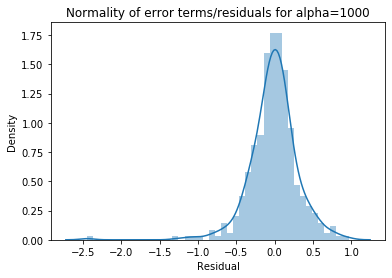

R2 Score for training Data:  0.9049019272010521
R2 Score for test Data:  0.8965945996793672
Mean Squared Error for training Data:  0.09509807279894791
Mean Squared Error for test Data:  0.09922218004884474


In [92]:
alpha = [10.0, 20, 50, 100, 500, 1000 ]

for i in alpha:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)
    residual = y_test - y_pred_test
    p = sns.distplot(residual,kde=True)
    p = plt.title('Normality of error terms/residuals for ' + 'alpha=' + str(i))
    plt.xlabel("Residual")
    plt.show()
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2 Score for training Data: ", r2_train_lr)
    
    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2 Score for test Data: ", r2_test_lr)
    
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("Mean Squared Error for training Data: ", mse_train_lr)
    
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("Mean Squared Error for test Data: ",  mse_test_lr)
    

In [85]:
#Fitting Ridge model for alpha = 100 and printing coefficients
ridge = Ridge(alpha=50)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.40280227e-03  1.57579794e-01  1.00623167e-01 -7.59829642e-02
 -3.19924155e-02  2.18328602e-02  1.36319324e-02 -1.90912267e-02
  4.28532723e-02 -1.77755120e-02  3.48240889e-02  2.69854855e-02
  6.72791631e-02 -6.18239185e-03  1.96214020e-02 -5.23609103e-03
  7.10282085e-02  2.58059485e-02  4.53511128e-02  1.05123398e-01
  5.61534221e-02  7.57930500e-03  1.27565571e-01  1.37473258e-02
 -6.17001590e-02  4.09437721e-02  4.63750679e-02  7.19664112e-03
  6.15723559e-02  4.32006476e-02  1.52534214e-02 -7.85034724e-04
  2.02731769e-03  6.84554659e-02  4.15458838e-02  2.87307607e-02
  3.34129481e-02  2.46551262e-02 -1.65332336e-02  2.40829929e-02
 -6.39543077e-03 -3.88210921e-03 -1.06512043e-02  1.87771807e-02
  2.83241102e-02  1.71241493e-03 -3.60537983e-02  9.08809885e-03
 -2.32894939e-03 -4.97359341e-03 -1.11414650e-02  6.73725823e-02
  2.36693015e-02  8.68492642e-02  3.92615833e-02  2.07091933e-02
  1.62205559e-02  7.57678543e-03  1.48046772e-02  0.00000000e+00
  2.55860289e-02 -1.98562

In [86]:
# Lets calculate some metrics such as R2 score and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for training Data: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for test Data: ", r2_test_lr)
metric2.append(r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error for training Data: ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for test Data: ",  mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 Score for training Data:  0.9360073100275867
R2 Score for test Data:  0.9069696056201422
Mean Squared Error for training Data:  0.06399268997241321
Mean Squared Error for test Data:  0.08926689043852061


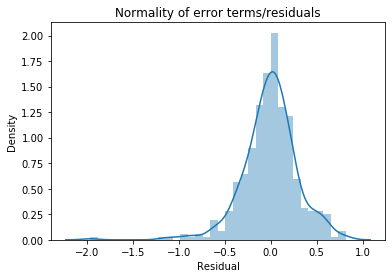

In [87]:
residual = y_test - y_pred_test
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

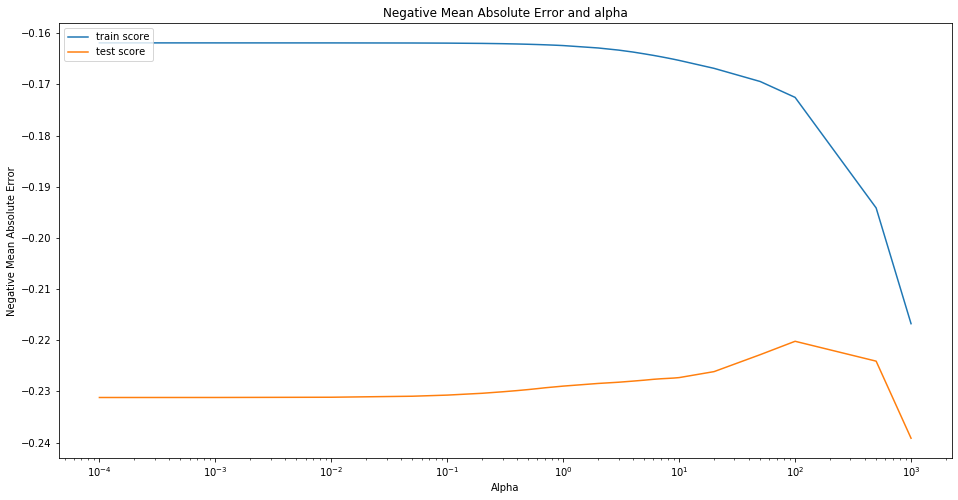

In [81]:
# plotting mean test and train scores with alpha
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlabel('Alpha')
plt.xscale('log')
plt.show()

**> Now Lets Build a model with RFE selected Variables**

In [286]:
# list of hyper parameters to tune. If value too high it will lead to underfitting. 
#If it is too low, it will not handle the overfitting.

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [287]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_) 
alpha = model_cv.best_params_['alpha']

{'alpha': 10.0}


In [288]:
#Fitting Ridge model for alpha = 10 and printing coefficients
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.20849966  0.10702724 -0.12026217  0.03211431  0.03963736  0.08086989
  0.01100392 -0.01720217  0.06917818  0.03419995  0.10466427  0.10167411
  0.01587406  0.16687254 -0.06137253  0.04796509  0.04302217  0.09777292
  0.06132173  0.04755879  0.02926142  0.04248792 -0.04985003  0.01010333
  0.20232754  0.06762822  0.30219182  0.19708714  0.          0.04058537
  0.0440664   0.03350374  0.06988721 -0.02972808  0.05187301  0.04957328
  0.03666182 -0.08818894  0.          0.01010333 -0.05179453 -0.05047809
  0.         -0.02664692  0.03196536 -0.00325773 -0.05016488 -0.06149088
 -0.00325773  0.0356743   0.          0.05042736  0.04148741  0.06057576
  0.04008587  0.03943786  0.04409713  0.04748318 -0.03515244  0.
  0.03114442  0.06512631  0.02015687  0.02178368  0.03919759 -0.00417815
  0.02633544  0.06148131  0.07129376  0.0277772 ]


In [289]:
# Lets calculate some metrics such as R2 score and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for training Data: ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for test Data: ", r2_test_lr)
metric2.append(r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error for training Data: ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for test Data: ",  mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 Score for training Data:  0.9288422154518519
R2 Score for test Data:  0.9156456903563702
Mean Squared Error for training Data:  0.07115778454814817
Mean Squared Error for test Data:  0.0809417929180066


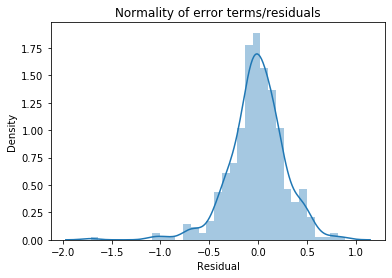

In [290]:
residual = y_test - y_pred_test
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

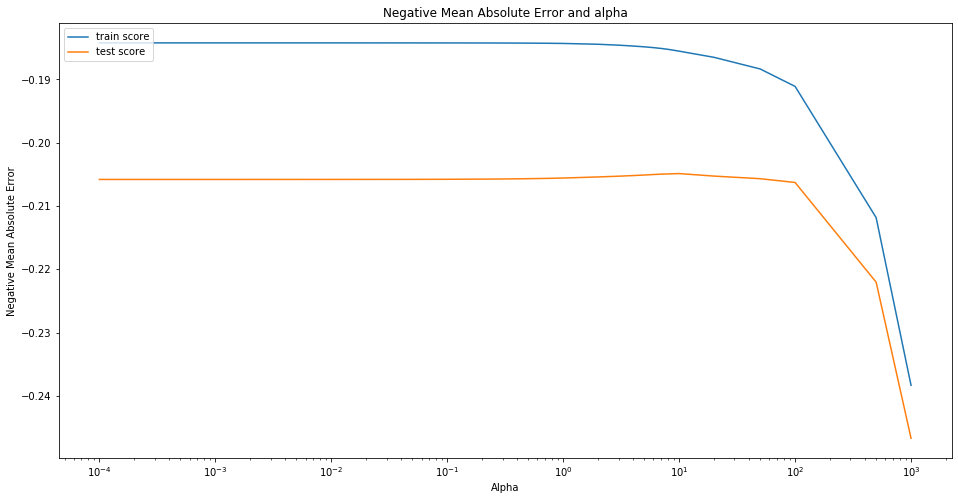

In [291]:
# plotting mean test and train scores with alpha 
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlabel('Alpha')
plt.xscale('log')
plt.show()

### Observation:

**Below scores are for the first model which has all the variables:**<br />
R2 Score for training Data:  0.933860875366193<br />
R2 Score for test Data:  0.9078219943937623<br />
Mean Squared Error for training Data:  0.06613912463380704<br />
Mean Squared Error for test Data:  0.08844898468016071<br />



**Below scores are for the second model which has only the RFE selected variables:**<br />
R2 Score for training Data:  0.9288422154518519<br />
R2 Score for test Data:  0.9156456903563702<br />
Mean Squared Error for training Data:  0.07115778454814817<br />
Mean Squared Error for test Data:  0.0809417929180066<br />

From above score it is evident that the second model is better as R2 and MSE scores are higher in the second Model.<br />
Also Residual Plot shows more Normal Distribution nature in the second model.<br />
So if we have to choose between these two we will select the second one.

But we have not seen yet how Lasso regression performs. Lets do that now.

# Lasso Regression

We will take the same approach here. 
### >Lets build the first model with complete data.

In [292]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [293]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
alpha = model_cv.best_params_['alpha']

{'alpha': 0.01}


In [294]:
#Fitting Lasso model for alpha = 0.01 and printing coefficients 
alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 0.00000000e+00  2.15533986e-01  8.54399645e-02 -8.85090670e-02
 -3.01928697e-02  7.13922479e-03  1.95803716e-02 -3.79726907e-03
  1.58003063e-02 -0.00000000e+00  3.04422300e-02  1.28411869e-02
  7.92568768e-02  0.00000000e+00  4.55406335e-03 -0.00000000e+00
  5.40681094e-02  2.46463371e-02  3.32856222e-02  4.19789519e-02
  0.00000000e+00 -0.00000000e+00  2.65259828e-01  0.00000000e+00
 -4.54935691e-02  3.27812614e-02  2.43639712e-02 -0.00000000e+00
  7.27818505e-02  3.05346157e-02  5.14457886e-03 -0.00000000e+00
  0.00000000e+00  5.78543752e-02  3.71212398e-02  1.65973913e-02
  2.67702274e-02 -0.00000000e+00 -2.49654984e-02  2.36963997e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.59243376e-03  0.00000000e+00 -2.91435704e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  3.29485737e-02
  1.04752133e-03  5.04593466e-02 -0.00000000e+00  6.12162387e-03
  6.51249504e-03  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.78181609e-02 -0.00000

In [295]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for training Data: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for test Data: ", r2_test_lr)
metric3.append(r2_test_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error for training Data: ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for test Data: ",  mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Score for training Data:  0.9247551435305337
R2 Score for test Data:  0.9191071858309999
Mean Squared Error for training Data:  0.0752448564694663
Mean Squared Error for test Data:  0.07762033072979402


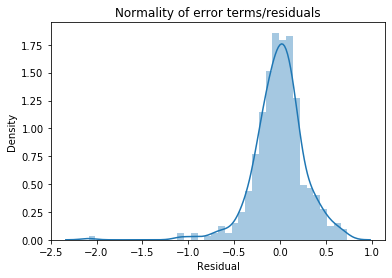

In [296]:
# Checking if the residuals are normally distributed.
residual = y_test - y_pred_test
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

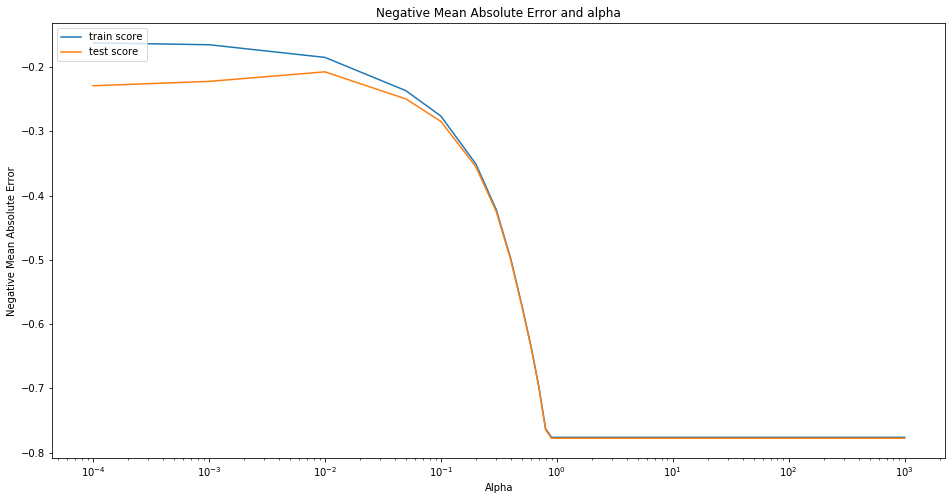

In [297]:
# plotting mean test and train scores with alpha 
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlabel('Alpha')
plt.xscale('log')
plt.show()

#### >Lets now build a model with RFE selected features

In [298]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [299]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
alpha = model_cv.best_params_['alpha']

{'alpha': 0.0001}


In [300]:
#Fitting Lasso model for alpha = 0.01 and printing coefficients 
alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)
print(lasso.coef_)

[ 0.23677575  0.10597179 -0.12349894  0.00787625  0.03576033  0.09306517
  0.00693075 -0.          0.060164    0.03680264  0.02442601  0.
 -0.          0.2966378  -0.04609305  0.04855449  0.0216291   0.10639074
  0.052614    0.03733985  0.01754449  0.01947465 -0.04198641 -0.
  0.06367234  0.00767107  0.07598602 -0.          0.          0.03024402
  0.02043964  0.03116822  0.05331893 -0.01710904  0.04010617  0.03357263
  0.02593168 -0.08236156  0.         -0.         -0.         -0.
  0.         -0.01395871  0.02976533 -0.         -0.00106144 -0.00758278
 -0.         -0.          0.          0.         -0.         -0.
  0.00239463  0.0221593   0.00657908  0.         -0.02495966  0.
  0.02480868  0.01672269  0.          0.         -0.         -0.02077188
  0.00411457  0.01162357  0.05202484  0.06140276]


In [301]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score for training Data: ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score for test Data: ", r2_test_lr)
metric3.append(r2_test_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error for training Data: ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error for test Data: ",  mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 Score for training Data:  0.918916698503848
R2 Score for test Data:  0.917062109753026
Mean Squared Error for training Data:  0.08108330149615188
Mean Squared Error for test Data:  0.07958267414892996


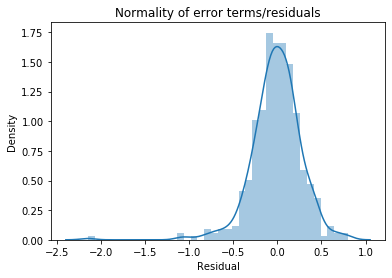

In [302]:
# Checking if the residuals are normally distributed.
residual = y_test - y_pred_test
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

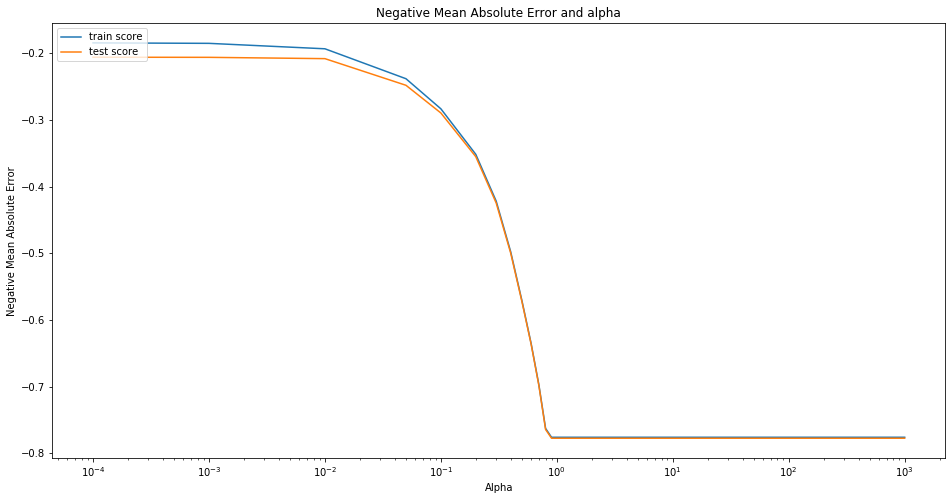

In [303]:
# plotting mean test and train scores with alpha 
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
plt.figure(figsize=(16,8))
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlabel('Alpha')
plt.xscale('log')
plt.show()

So now we have created total 5 models as below chronologically:

1. Linear regression model with RFE selected features.
2. Ridge regression model with all features
3. Ridge regression model with RFE selected features.
4. Lasso regression model with all features
5. Lasso regression model with RFE selected features.

We have already seen Linear Regression model didnt perform well.

Let us now compare quickly the scores of 2 ridge and 2 lasso models.

**Ridge regression model with all features:**<br />
R2 Score for training Data: 0.933860875366193<br />
R2 Score for test Data: 0.9078219943937623<br />
Mean Squared Error for training Data:  0.06613912463380704<br />
Mean Squared Error for test Data:  0.08844898468016071<br />



**Ridge regression model with RFE selected features:**<br />
R2 Score for training Data:  0.9288422154518519<br />
R2 Score for test Data:  0.9156456903563702<br />
Mean Squared Error for training Data:  0.07115778454814817<br />
Mean Squared Error for test Data:  0.0809417929180066<br />



**Lasso regression model with all features:**<br />
R2 Score for training Data:  0.9247551435305337<br />
R2 Score for test Data:  0.9191071858309999<br />
Mean Squared Error for training Data:  0.0752448564694663<br />
Mean Squared Error for test Data:  0.07762033072979402<br />



**Lasso regression model with RFE selected features:**<br />
R2 Score for training Data:  0.918916698503848<br />
R2 Score for test Data:  0.917062109753026<br />
Mean Squared Error for training Data:  0.08108330149615188<br />
Mean Squared Error for test Data:  0.07958267414892996<br />



###### Compairing the above models scores we can finally say that the last model i.e "Lasso regression model with RFE selected features" is the best one among these.

In [304]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
OverallQual,0.20850,0.23678
OverallCond,0.10703,0.10597
YearBuilt,-0.12026,-0.12350
MasVnrArea,0.03211,0.00788
BsmtExposure,0.03964,0.03576
BsmtFinSF1,0.08087,0.09307
BsmtFinSF2,0.01100,0.00693
BsmtUnfSF,-0.01720,-0.00000
TotalBsmtSF,0.06918,0.06016
HeatingQC,0.03420,0.03680


## Conclusion :

- we got a decent score for both Ridge and Lasso regression.
- Ridge : Train :92.88    Test :91.56
- Lasso : Train :91.9    Test :91.70

## As per the problem statement The company wants to know:
* Which variables are significant in predicting the price of a house

* How well those variables describe the price of a house.

In the below segment we have given the features that are significant and impacts the price of a house

#### Top 10 most significant variables in Ridge are:

**Variables with positive coefficient**
- MSZoning_RL	0.30219
- OverallQual	0.2085
- MSZoning_FV	0.20233
- MSZoning_RM	0.19709


**Variables with negative coefficient**
- RoofStyle_Gable: 	-0.05179
- KitchenAbvGr: 	-0.06137
- Exterior1st_Wd Sdng: 	-0.06149
- Condition2_PosN: 	-0.08819
- YearBuilt: 	-0.12026


#### Top 10 most significant variables in Lasso are:
**Variables with positive coefficient**
- GrLivArea	0.29664
- OverallQual	0.23678
- GarageCars	0.10639
- OverallCond	0.10597
- BsmtFinSF1	0.09307

**Variables with negative coefficient**
- Functional_Maj2: 	-0.02496
- MSSubClass_2-STORY PUD - 1946 & NEWER: 	-0.04199
- KitchenAbvGr: 	-0.04609
- Condition2_PosN: 	-0.08236
- YearBuilt: 	-0.1235

### These Varaiables are directly proportional to each other.

- Optimal Value of lamda for ridge : 10
- Optimal Value of lamda for Lasso : 0.0001

### Because of Feature selection as well we can choose Lasso regression in this case.

 # Subjective Question:

**Question 1:** What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose to double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Answer:** As we have already seen we got:
- Optimal Value of lamda for ridge : 10
- Optimal Value of lamda for Lasso : 0.0001

Now we will double it i.e Optimal Value of lamda for ridge will become 20 and Optimal Value of lamda for Lasso will become 0.0002.

In [307]:
#Fitting Ridge model for alpha = 20 and printing coefficients

alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(5)

[ 0.20809881  0.10770954 -0.11680862  0.03139975  0.03922269  0.08053611
  0.0112036  -0.01649923  0.06964807  0.03447067  0.10433779  0.09828711
  0.01390542  0.16355097 -0.06275156  0.05019027  0.04648857  0.09650542
  0.06418559  0.04689306  0.0290588   0.04019614 -0.04870598  0.00991987
  0.15250671  0.04824673  0.21266122  0.11951199  0.          0.04034482
  0.04331941  0.03406332  0.06918071 -0.02805591  0.05076897  0.04855701
  0.03630502 -0.08697487  0.          0.00991987 -0.04574893 -0.04558743
  0.         -0.02547907  0.03293497 -0.00330004 -0.04112737 -0.05721711
 -0.00330004  0.02678021  0.          0.04529207  0.02818026  0.0448173
  0.03132787  0.04093339  0.04193673  0.04358266 -0.03415634  0.
  0.03089991  0.05010926  0.01459912  0.01479588  0.02439793 -0.01363656
  0.02302795  0.05256948  0.07296659  0.03799443]


,Feature,Coef
27,MSZoning_RM,0.21266
1,OverallCond,0.20810
14,KitchenAbvGr,0.16355
25,MSZoning_RH,0.15251
28,Utilities_NoSeWa,0.11951


In [309]:
#Fitting Lasso model for alpha = 0.0002 and printing coefficients

alpha = 0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

[ 0.20607242  0.10361503 -0.12280162  0.03265872  0.04159869  0.09813967
  0.01640986 -0.          0.05191973  0.03497802  0.11296755  0.11642685
  0.02112615  0.16004692 -0.05652056  0.04539972  0.03700902  0.10062203
  0.05714067  0.04919604  0.02856498  0.04544367 -0.05079449  0.00614263
  0.32605672  0.11592242  0.52633677  0.39032242  0.          0.04052278
  0.04380254  0.03239255  0.07011276 -0.03390361  0.05359043  0.05071713
  0.03692558 -0.08898718  0.          0.01194229 -0.05576122 -0.05086304
  0.         -0.02820127  0.02999769 -0.00558007 -0.05784003 -0.06543749
 -0.00079175  0.04330549  0.          0.05628771  0.06104001  0.08423027
  0.05359351  0.03609655  0.04656256  0.05423855 -0.03707864  0.
  0.03257476  0.09135533  0.03122106  0.03404658  0.06398785  0.01261642
  0.03400061  0.08512782  0.06456693 -0.00108532]


,Feature,Coef
27,MSZoning_RM,0.52634
28,Utilities_NoSeWa,0.39032
25,MSZoning_RH,0.32606
1,OverallCond,0.20607
14,KitchenAbvGr,0.16005


**Question 3:** After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Currently below are our most significant positive features.
- GrLivArea	0.29664
- OverallQual	0.23678
- GarageCars	0.10639
- OverallCond	0.10597
- BsmtFinSF1	0.09307

We will now drop these columns from dataset and re-run our final model.

In [310]:
X_train_rfe.drop(['GrLivArea','OverallQual','GarageCars','OverallCond', 'BsmtFinSF1'],axis=1,inplace=True)

In [311]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [312]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
alpha = model_cv.best_params_['alpha']

{'alpha': 0.0001}


In [313]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)
print(lasso.coef_)

[-0.13293495  0.03550578  0.06159318 -0.02700225 -0.08840259  0.15238336
  0.05120512  0.29081044  0.31412672  0.0419263  -0.0817628   0.12395502
  0.03216792  0.08907884  0.06429867  0.02501153  0.04829612 -0.05445657
  0.00413071  0.39281479  0.13414824  0.6354326   0.49349116  0.
  0.04530162  0.04316955  0.02203184  0.08568129 -0.05694155  0.0730663
  0.06185478  0.03552069 -0.08826762  0.          0.01793281 -0.08215668
 -0.06097876  0.         -0.03358386  0.0318311  -0.01181896 -0.08128176
 -0.07851133 -0.00189832  0.06679584  0.          0.08371005  0.10807237
  0.12461402  0.09483867  0.0339284   0.06658668  0.07586117 -0.0442126
  0.          0.06729272  0.1521238   0.04696     0.05221628  0.12117706
 -0.00837982  0.03016747  0.03484979  0.07573171  0.05473418]


In [314]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_rfe.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
22,MSZoning_RM,0.63543
23,Utilities_NoSeWa,0.49349
20,MSZoning_RH,0.39281
9,LowQualFinSF,0.31413
8,2ndFlrSF,0.29081
6,HeatingQC,0.15238
57,GarageType_Basment,0.15212
21,MSZoning_RL,0.13415
49,MasVnrType_Stone,0.12461
12,TotRmsAbvGrd,0.12396


So the top 5 variables after removing the earlier top 5 variable are:
1. MSZoning_RM:	0.63543
2. Utilities_NoSeWa: 0.49349
3. MSZoning_RH:	0.39281
4. LowQualFinSF: 0.31413
5. 2ndFlrSF: 0.29081